In [1]:
from google.colab import drive
drive.mount('/content/mydrive/')
%cd /content/mydrive/MyDrive/LTSF_Linear

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).
/content/mydrive/MyDrive/LTSF_Linear


In [2]:
import os
from glob import glob
import pandas as pd
import json
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
root_path = "dataset/Water_Week"
dir_list = sorted(os.listdir(root_path))

# Lineplot

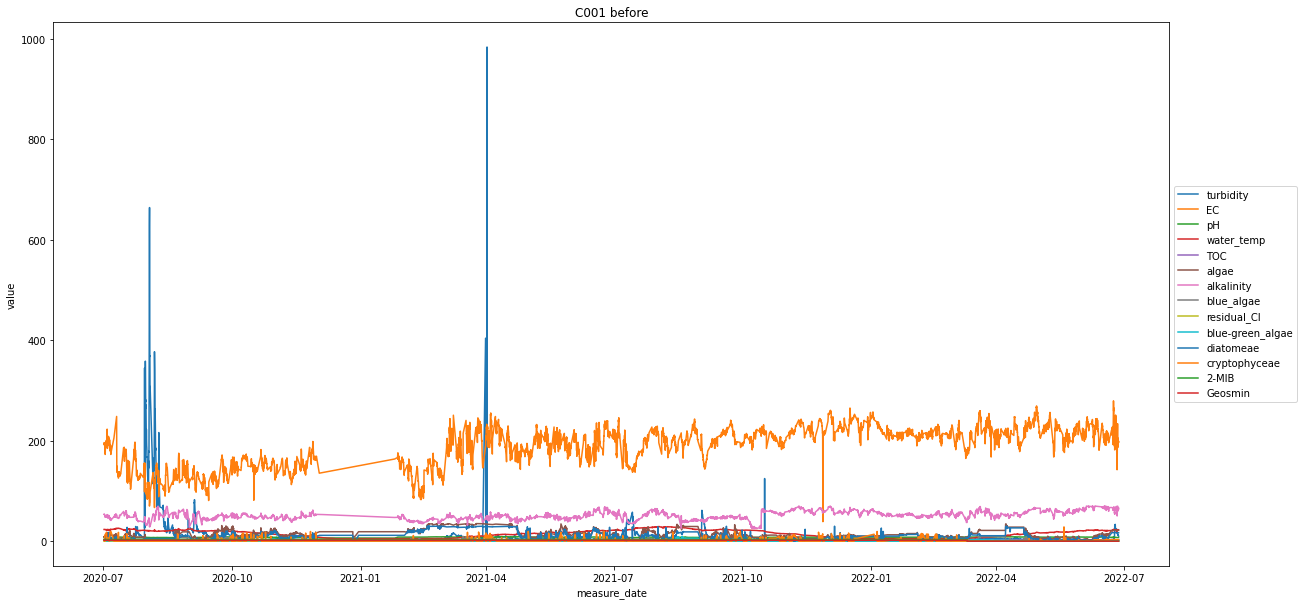

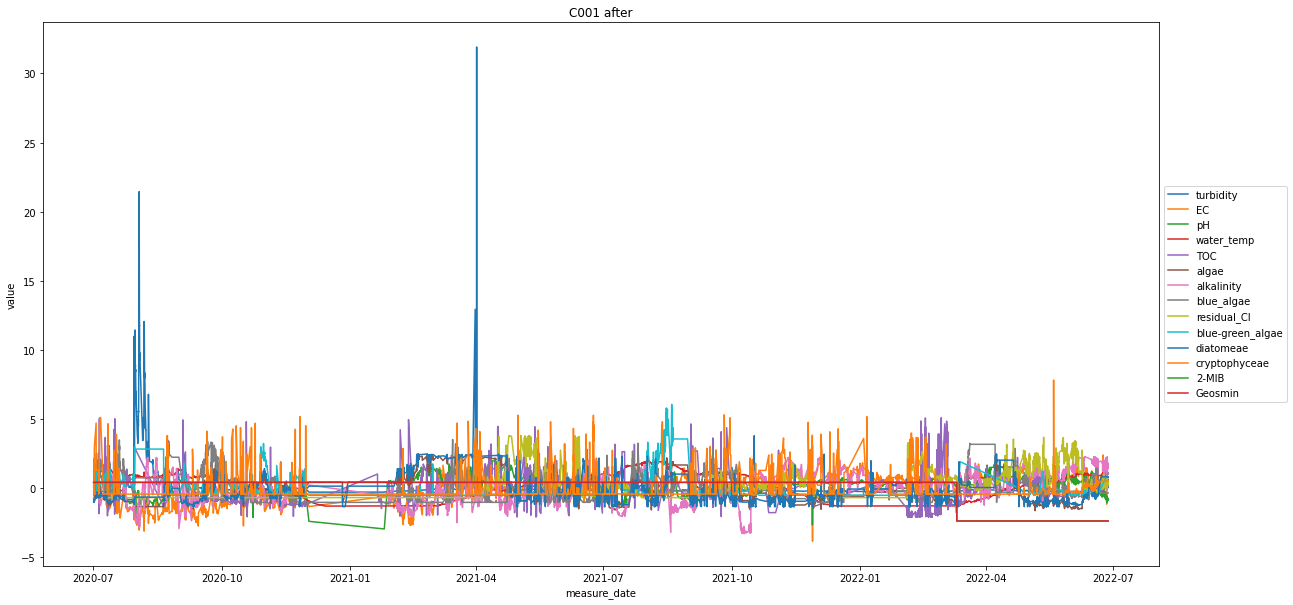

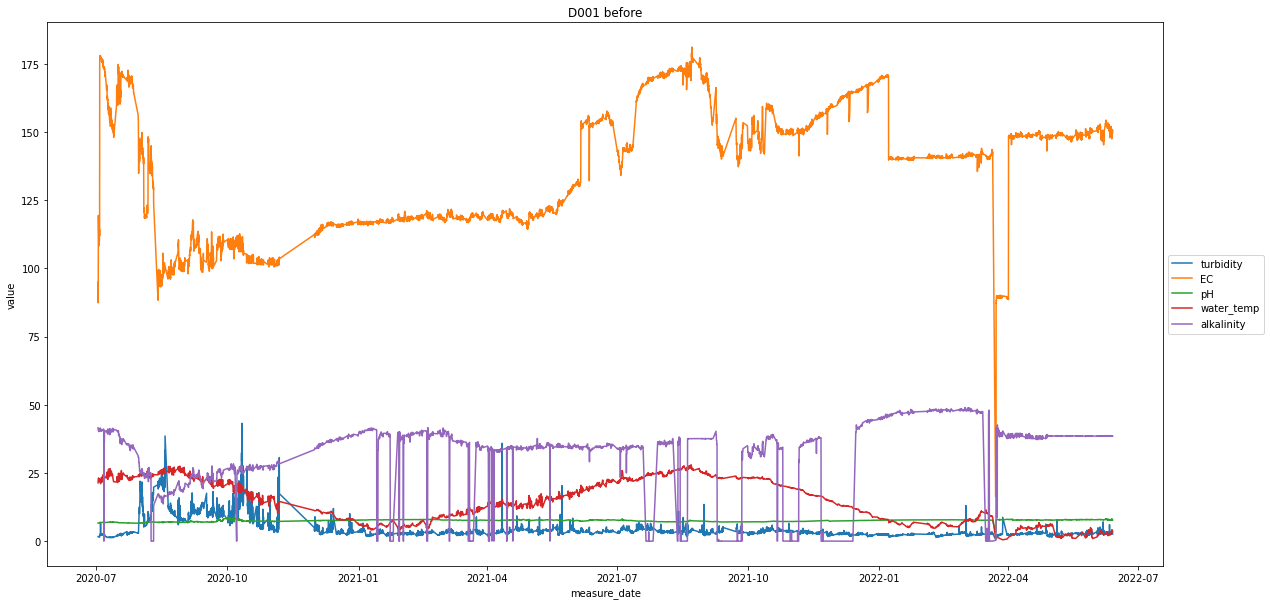

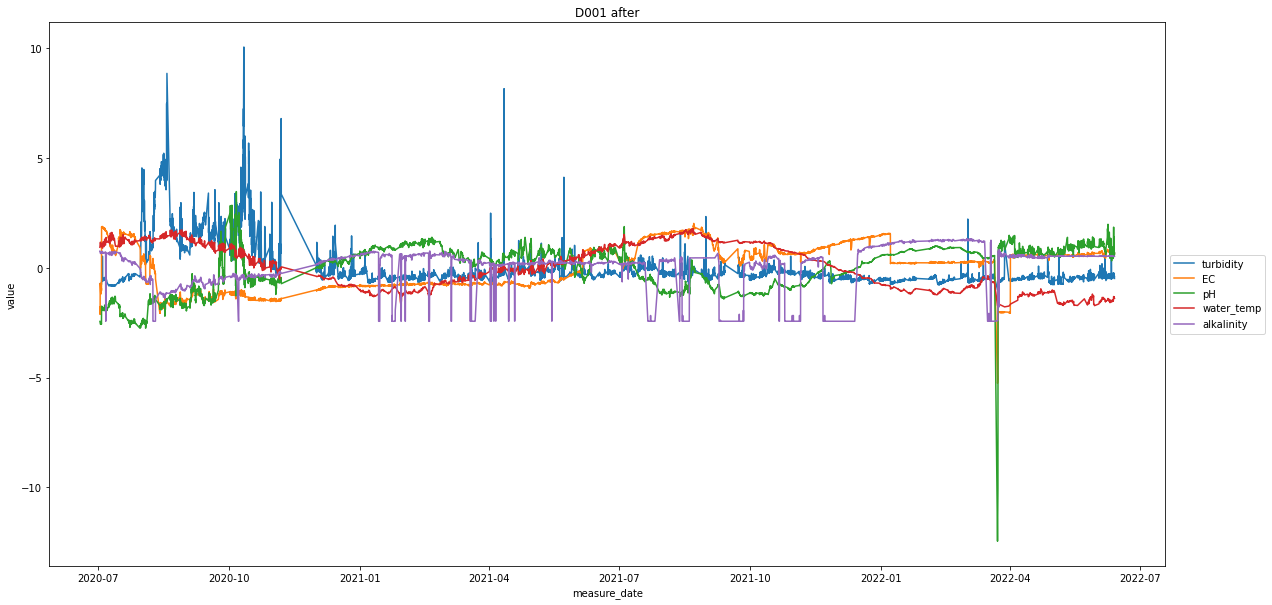

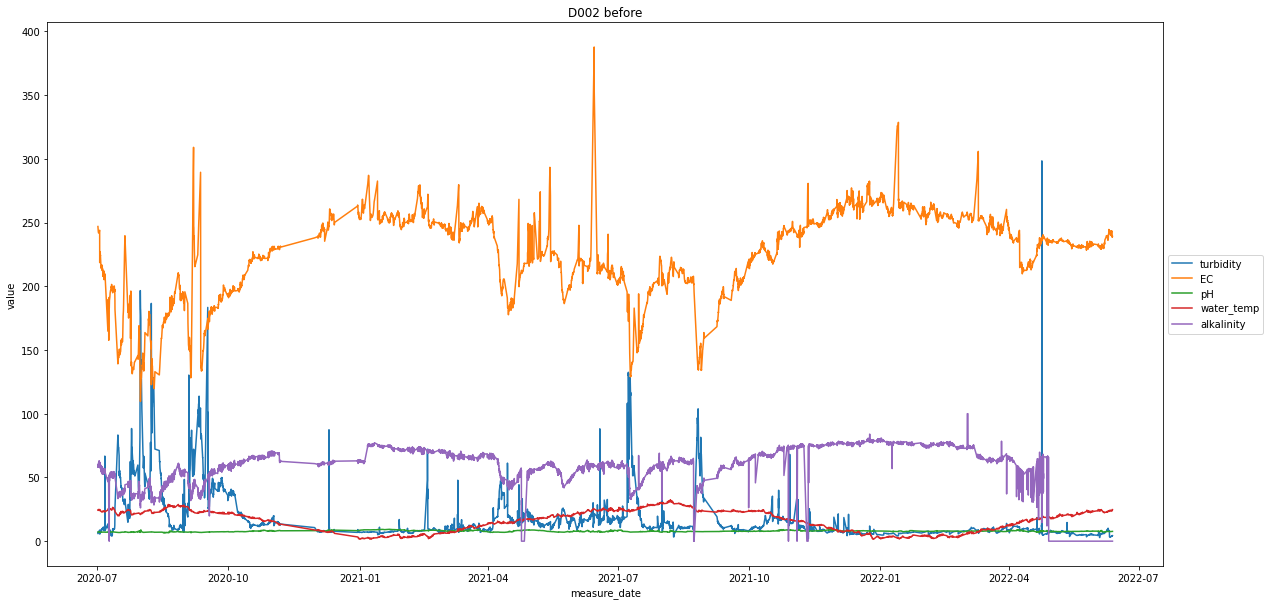

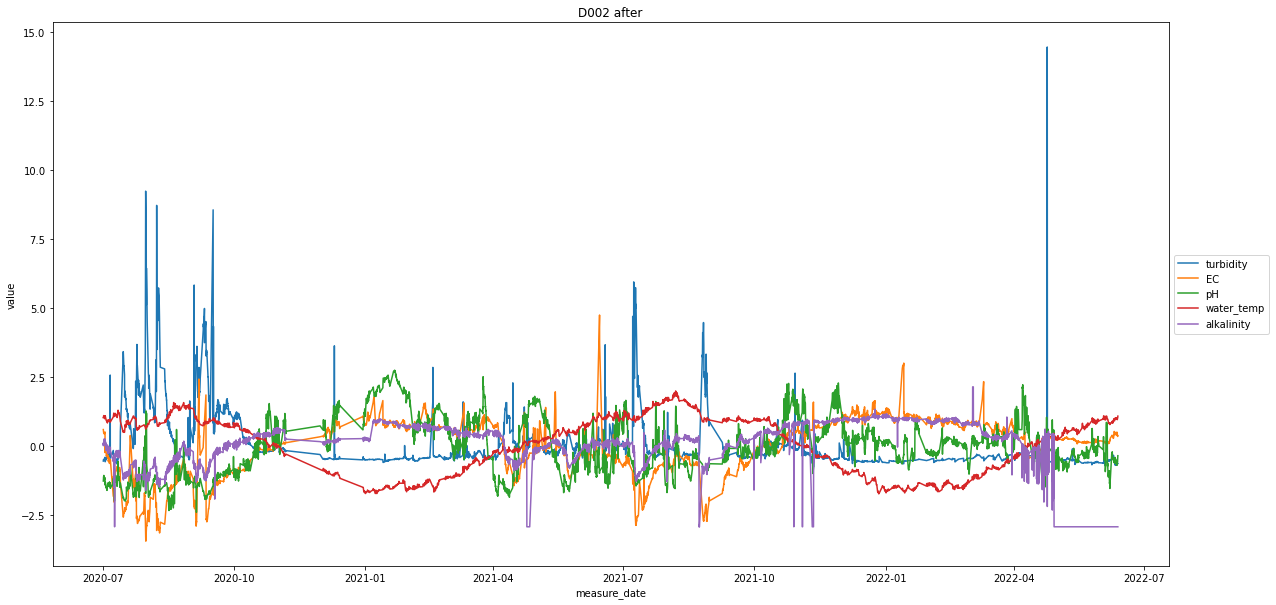

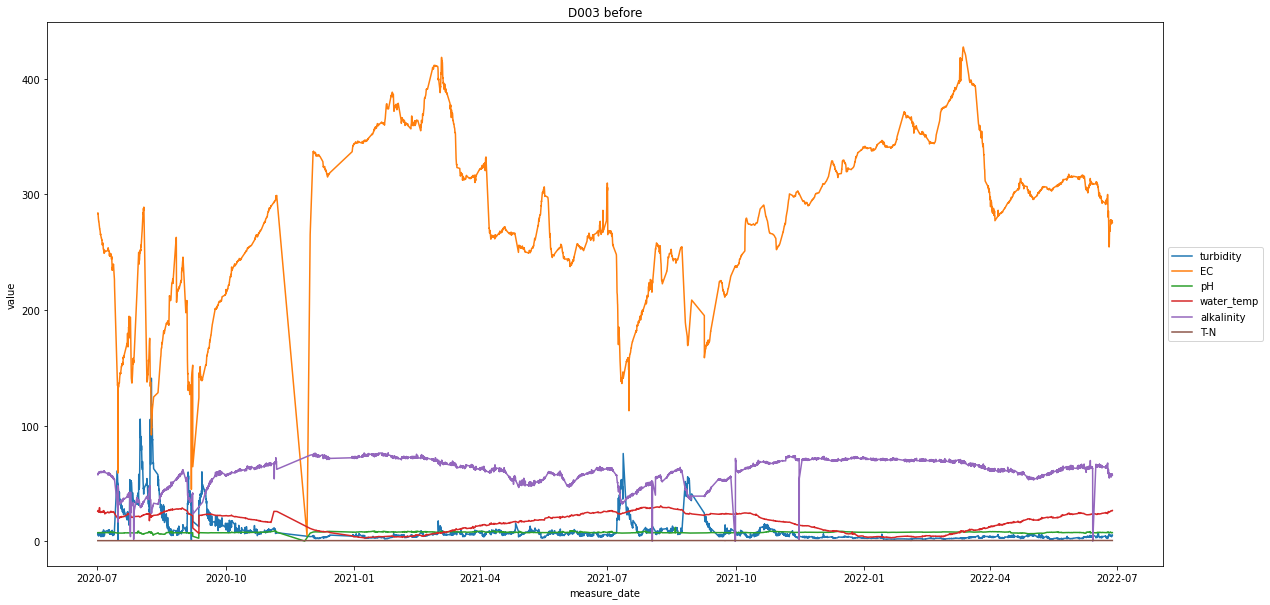

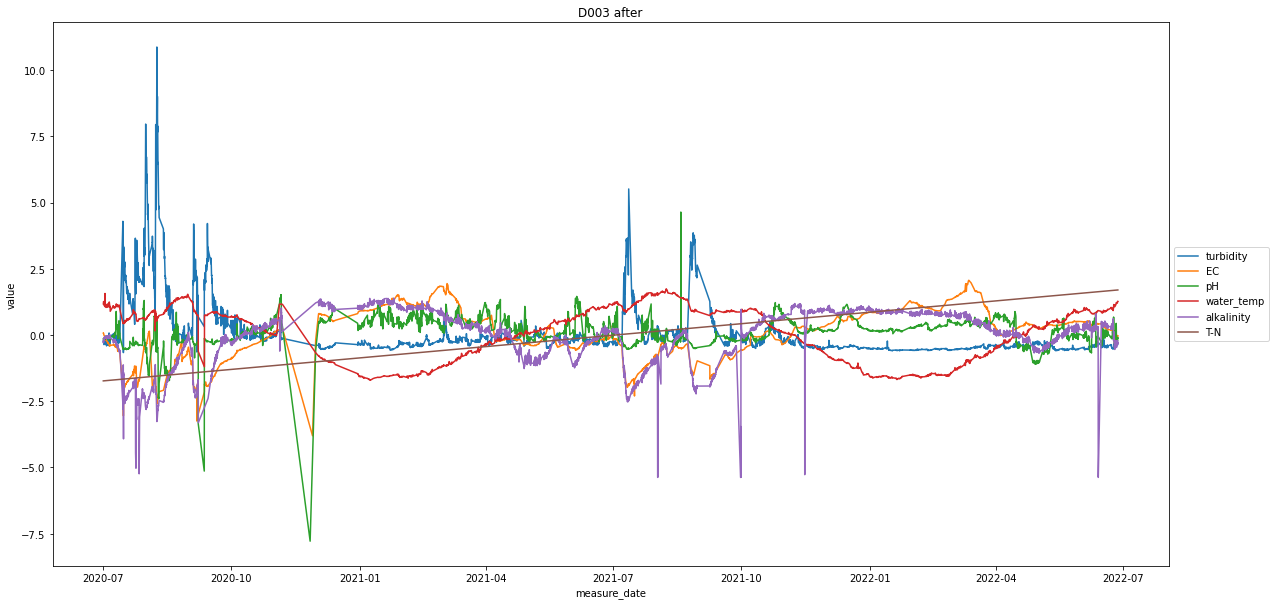

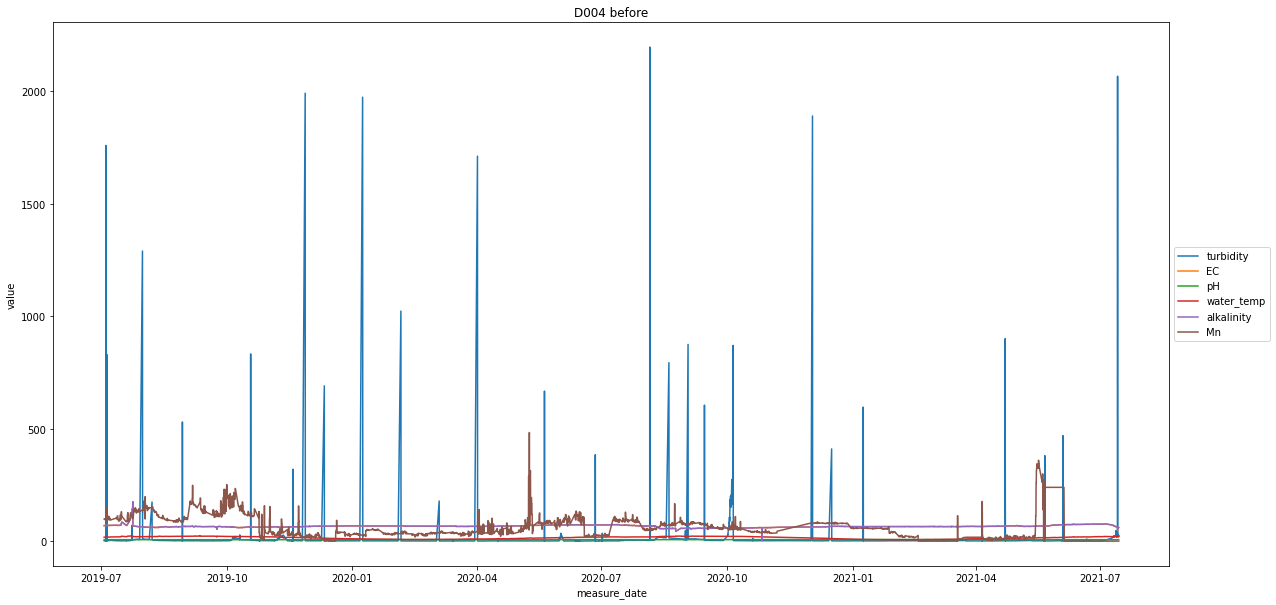

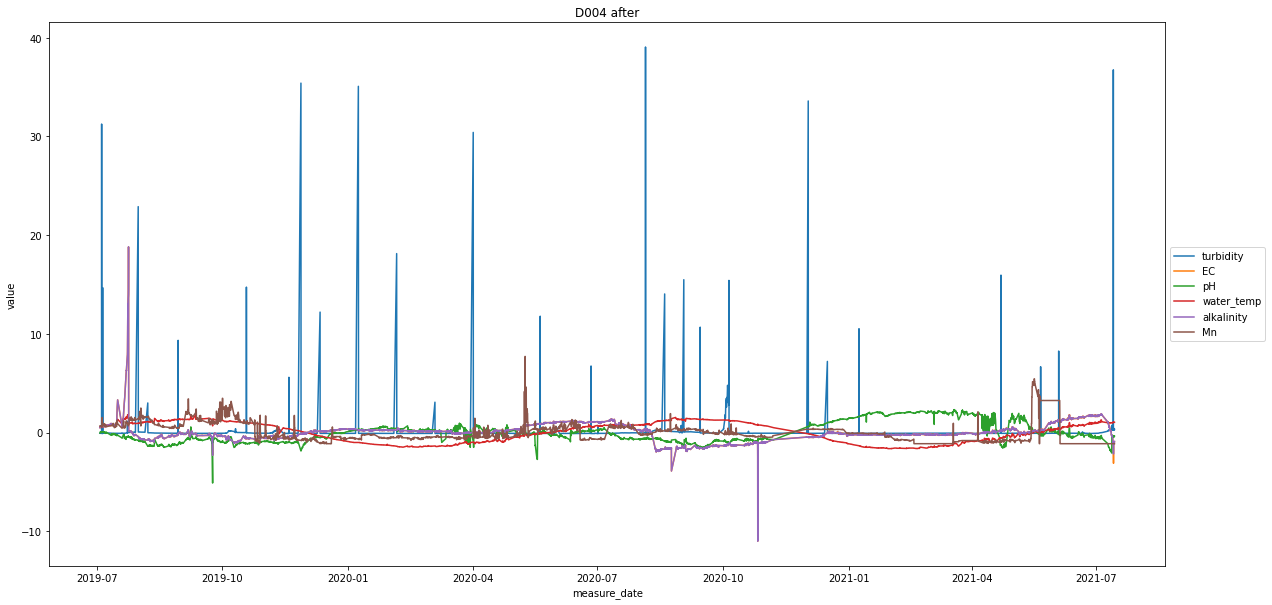

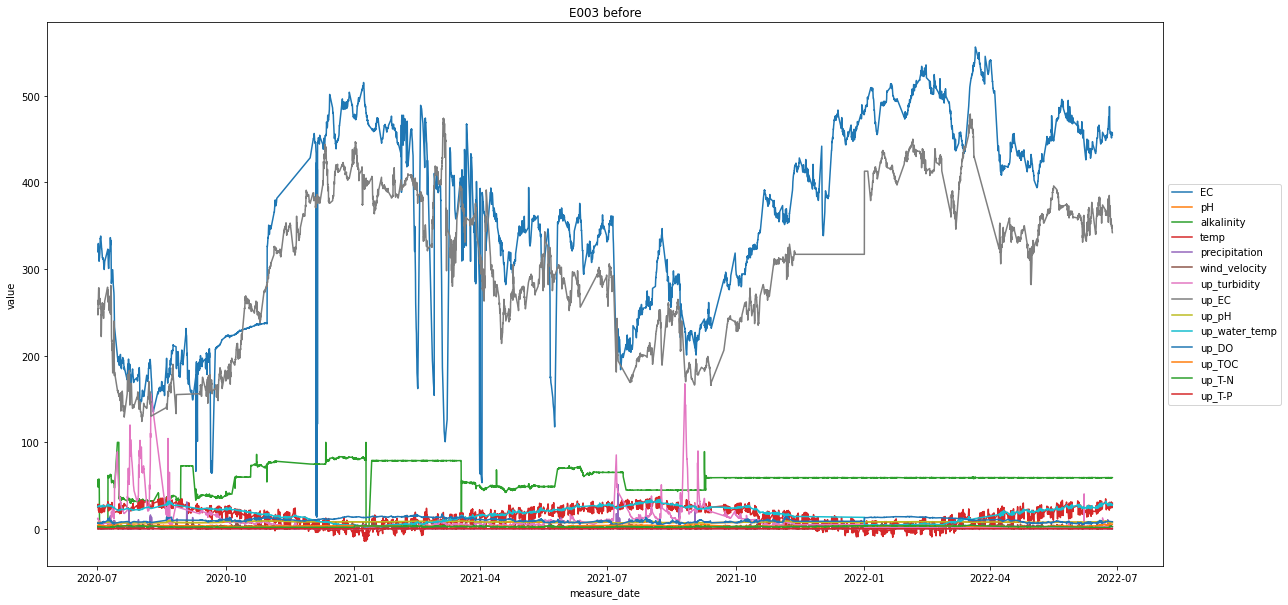

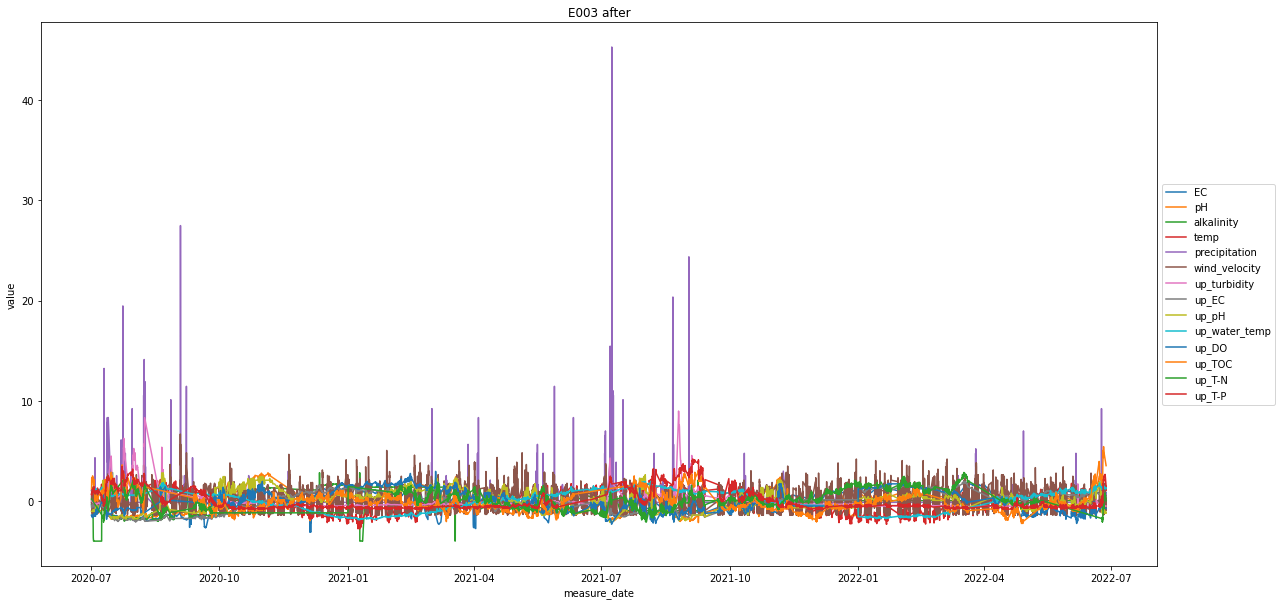

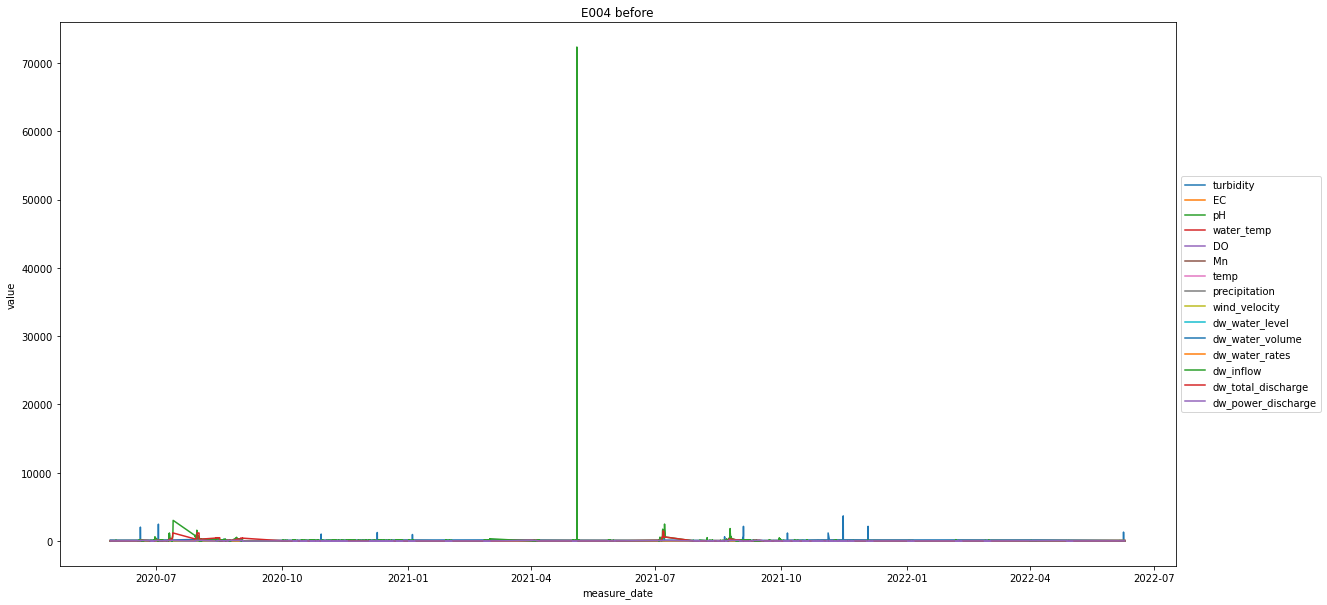

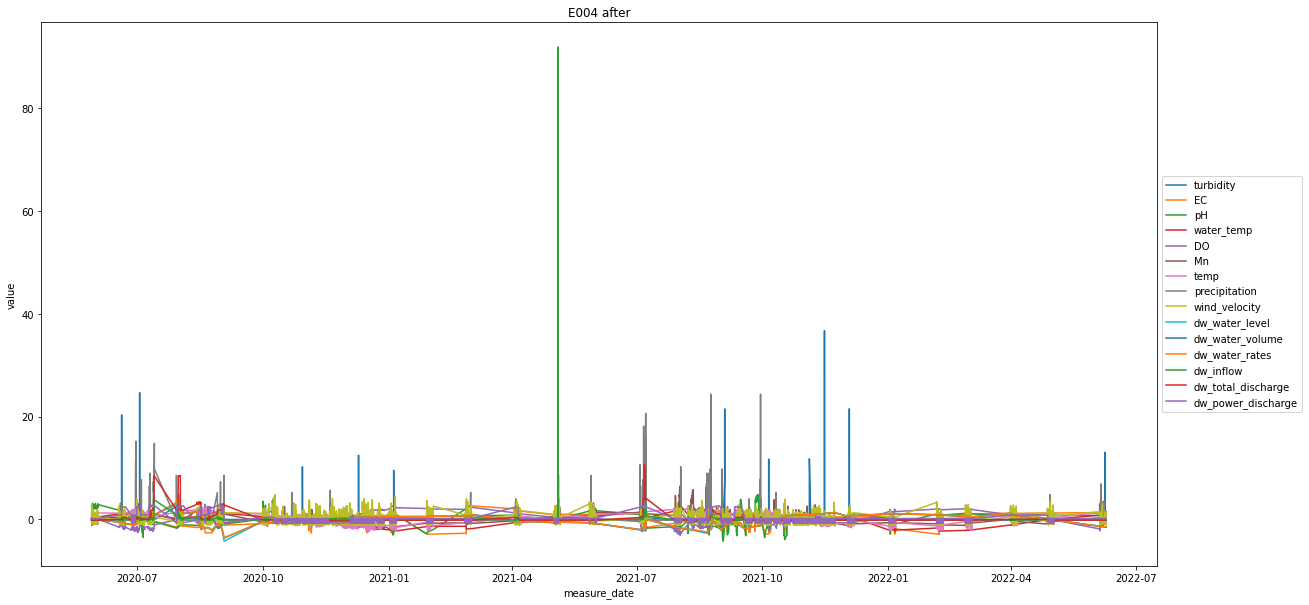

In [4]:
for dir in dir_list:
    data_list = sorted(glob(os.path.join(root_path, dir, "csv/*.csv")))

    df_raw = pd.DataFrame()
    for file in data_list:
        df_ = pd.read_csv(file)
        df_raw = pd.concat([df_raw, df_], axis=0, ignore_index=True)
    num_cols = list(df_raw.select_dtypes(include=np.number).columns)

    label_list = sorted(glob(os.path.join(root_path, dir, "hw3_json/*.json")))

    target_vals = []
    for js in label_list:
        with open(js, 'r') as f:
            label = json.load(f)
        input_cols = label['h']['input_serial'].split(',')
        target_cols = [k for k,v in label['w'].items() if(v is not None) & (k in num_cols) or (k == "measure_date")]
        vals = [label['w'][k] for k in target_cols]
        target_vals.append(vals)
    target_vals = np.array(target_vals)

    num_cols.append("measure_date")

    input = df_raw[num_cols]

    # drop empty columns
    clean_input = input.copy()
    clean_input.dropna(axis=1, how="all", inplace=True)

    # 한번만!
    clean_input['measure_date'] = clean_input['measure_date'].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M"))

    # lineplot
    n_cols = list(clean_input.select_dtypes(include=np.number).columns)

    # 정규화 전
    plt.figure(figsize=(20, 10))
    for col in n_cols:
        sns.lineplot(x="measure_date", y=col, data=clean_input)
    plt.legend(labels=n_cols, loc="center left", bbox_to_anchor=(1,0.5))
    plt.title(f"{dir[:4]} before")
    plt.ylabel("value")
    plt.show()

    # 정규화
    clean_input_reg = clean_input.copy()
    clean_input_reg[n_cols] = StandardScaler().fit_transform(clean_input_reg[n_cols])

    # 정규화 후
    plt.figure(figsize=(20, 10))
    for col in n_cols:
        sns.lineplot(x="measure_date", y=col, data=clean_input_reg)
    plt.legend(labels=n_cols, loc="center left", bbox_to_anchor=(1,0.5))
    plt.title(f"{dir[:4]} after")
    plt.ylabel("value")
    plt.show()